# The elementary cellular automaton
We have cells in a row (one-dimensional grid). Each cell has
- **state:** which can be zero or one.
- **neighborhood:** which is left and right cells of the current cell.

We also have a **set of rules** that are applied to the current cell and its neighborhood to update the state of the cell.
<br>**Hint:**  Although the rules are simple, we can create some interesting patterns with these elementary CAs.

###### by Hamed Shah-Hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#cellular automaton, elementary
class CA:
    def __init__(self,cols,rules):
        self.cols=cols # the number of cells in a row (1D grid)
        self.rules=rules 
        # one dimensional CA is composed of cols cells
        self.grid=np.zeros(cols,dtype=np.int16)   
        #initialize the grid cells with 1 in the middle
        self.grid[cols//2]=1 # turning ON the center cell
        # a copy of cells to generate next row
        self.gridNext=np.zeros(cols,dtype=np.int16)  
        self.row=0
    #generate next row of 1d CA
    def nextGen(self):
        if self.row==0:
            self.row=1
        else:
            for col in range(1,self.cols-1):
                temp=str(self.grid[col-1])+str(self.grid[col])+\
                str(self.grid[col+1])
                self.gridNext[col]=self.rules[7-int(temp,2)]
            self.grid=self.gridNext.copy()
        return self.grid

We generate several rows of cells, one after the other to create the pattern.

In [3]:
ruleset=[0,0,0,1,0,0,1,0] # rule 18
#ruleset=[0,0,0,1,1,1,1,0] # rule 30
#ruleset=[0,1,1,0,1,1,1,0] # rule 110
# rows=the number of generations
# cols: the number of cells
rows,cols=256,800
image=np.zeros((rows,cols),dtype=np.uint8)
myca=CA(cols,ruleset)
for row in range(rows):
    image[row]=255*myca.nextGen()

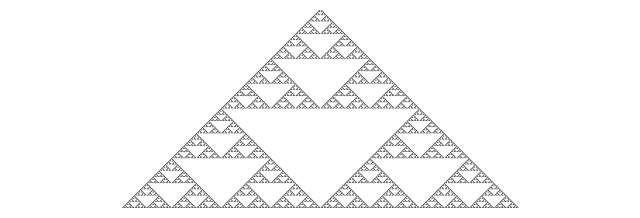

In [4]:
# showing the pattern generated by the CA
plt.figure(figsize=(8,7))
plt.imshow(image,cmap=plt.cm.gray_r)
plt.axis('off'); plt.show()